# Feedback 2 - Pandas + Pyplot

Choose either to use or to avoid `iris` object from seaborn package. It has in-built names for features and targets (flower species), but stores latter as integers in `iris.target`. On the other hand, `pandas` dataframe does not distinguish between features and targets.

This notebook assumes pure `pandas` approach.

In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import PercentFormatter
from sklearn import datasets
from pandas.plotting import scatter_matrix

# Opening CSV file
try:
    dataframe = pd.read_csv("iris.csv")
except IOError:
    pass

# Loading dataset from sklearn package
iris = datasets.load_iris()
# Creating data frame for pandas
dataframe = pd.DataFrame(iris["data"], columns=iris["feature_names"])

# Download from the internet
csv_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Requires setting column names manually
col_names = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width", "Class"]
dataframe = pd.read_csv(csv_url, names=col_names)

print(dataframe.head(10))
print(dataframe.describe())
print(np.unique(dataframe["Class"]))

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
m

In [2]:
# Colors were obtained via np.unique(scatter_matrix[0][1].get_children()[0].get_facecolor(), axis = 0)
species = {
    "Iris-setosa": {
        "name": "Setosa",
        "color": (0.267004, 0.004874, 0.329415, 0.8),
    },
    "Iris-versicolor": {
        "name": "Versicolor",
        "color": (0.127568, 0.566949, 0.550556, 0.8),
    },
    "Iris-virginica": {
        "name": "Virginica",
        "color": (0.993248, 0.906157, 0.143936, 0.8),
    },
}

# Mostly unused
features = {
    "Sepal_Length": {
        "name": "Sepal length (cm)",
    },
    "Sepal_Width": {
        "name": "Sepal width (cm)",
    },
    "Petal_Length": {
        "name": "Petal length (cm)",
    },
    "Petal_Width": {
        "name": "Petal width (cm)",
    },
}
for e, c in zip(features.values(), cm.rainbow(np.linspace(0, 1, len(features)))):
    e["color"] = c

# General settings
plt.rcParams.update({"font.size": 16})
plt.rcParams["figure.figsize"] = (20, 20)

features

{'Sepal_Length': {'name': 'Sepal length (cm)',
  'color': array([0.5, 0. , 1. , 1. ])},
 'Sepal_Width': {'name': 'Sepal width (cm)',
  'color': array([0.16666667, 0.8660254 , 0.8660254 , 1.        ])},
 'Petal_Length': {'name': 'Petal length (cm)',
  'color': array([0.83333333, 0.8660254 , 0.5       , 1.        ])},
 'Petal_Width': {'name': 'Petal width (cm)',
  'color': array([1.0000000e+00, 1.2246468e-16, 6.1232340e-17, 1.0000000e+00])}}

Scatter matrix original image.

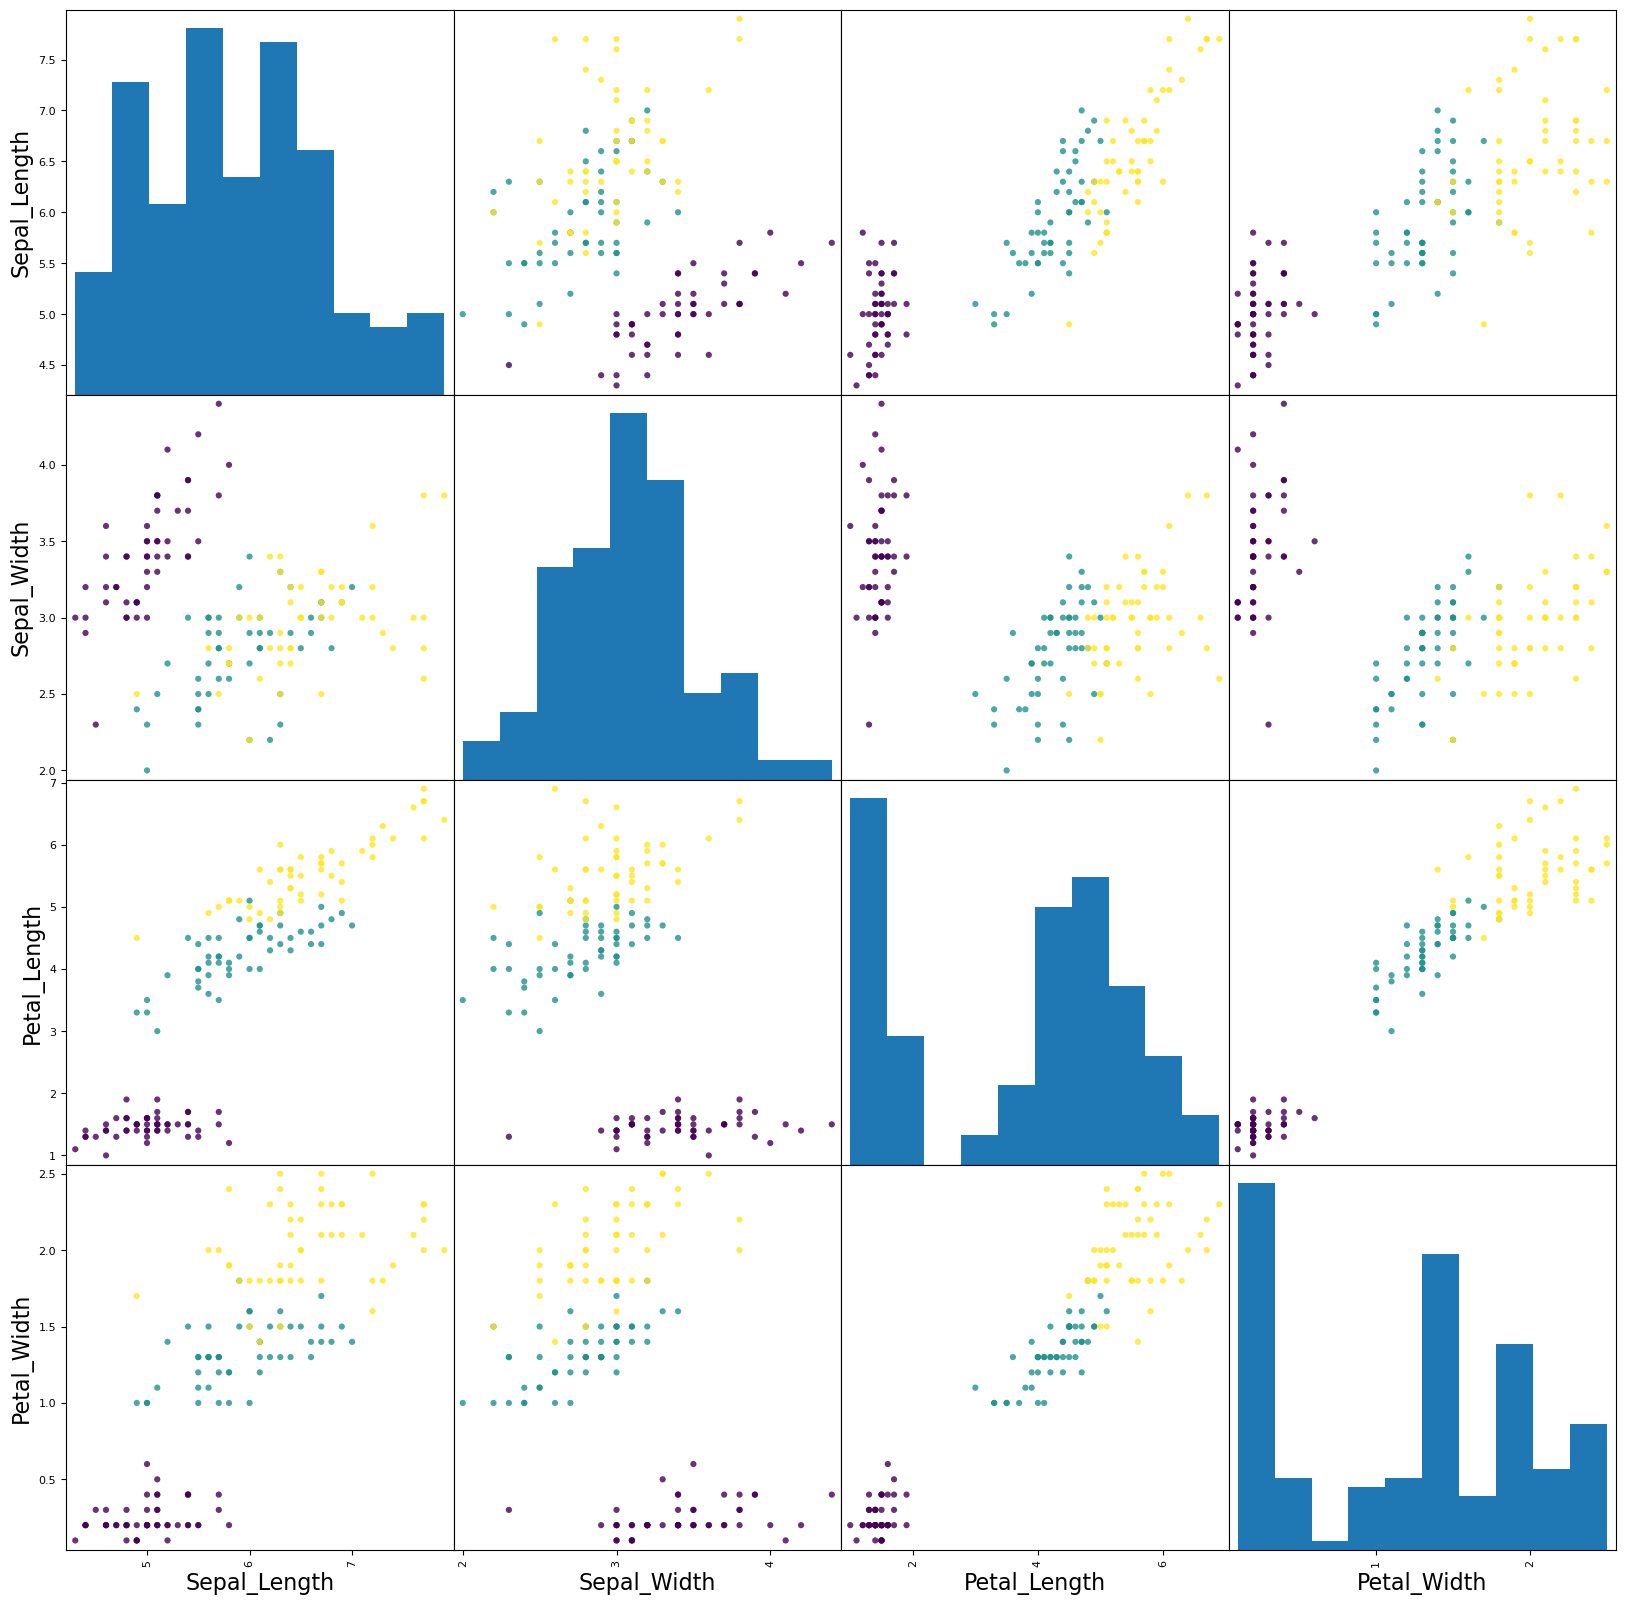

In [3]:
scatter_matrix = scatter_matrix(
    dataframe, c=iris["target"], marker="o", s=20, alpha=0.8
)
plt.show()

Scatter matrix will be reproduced.

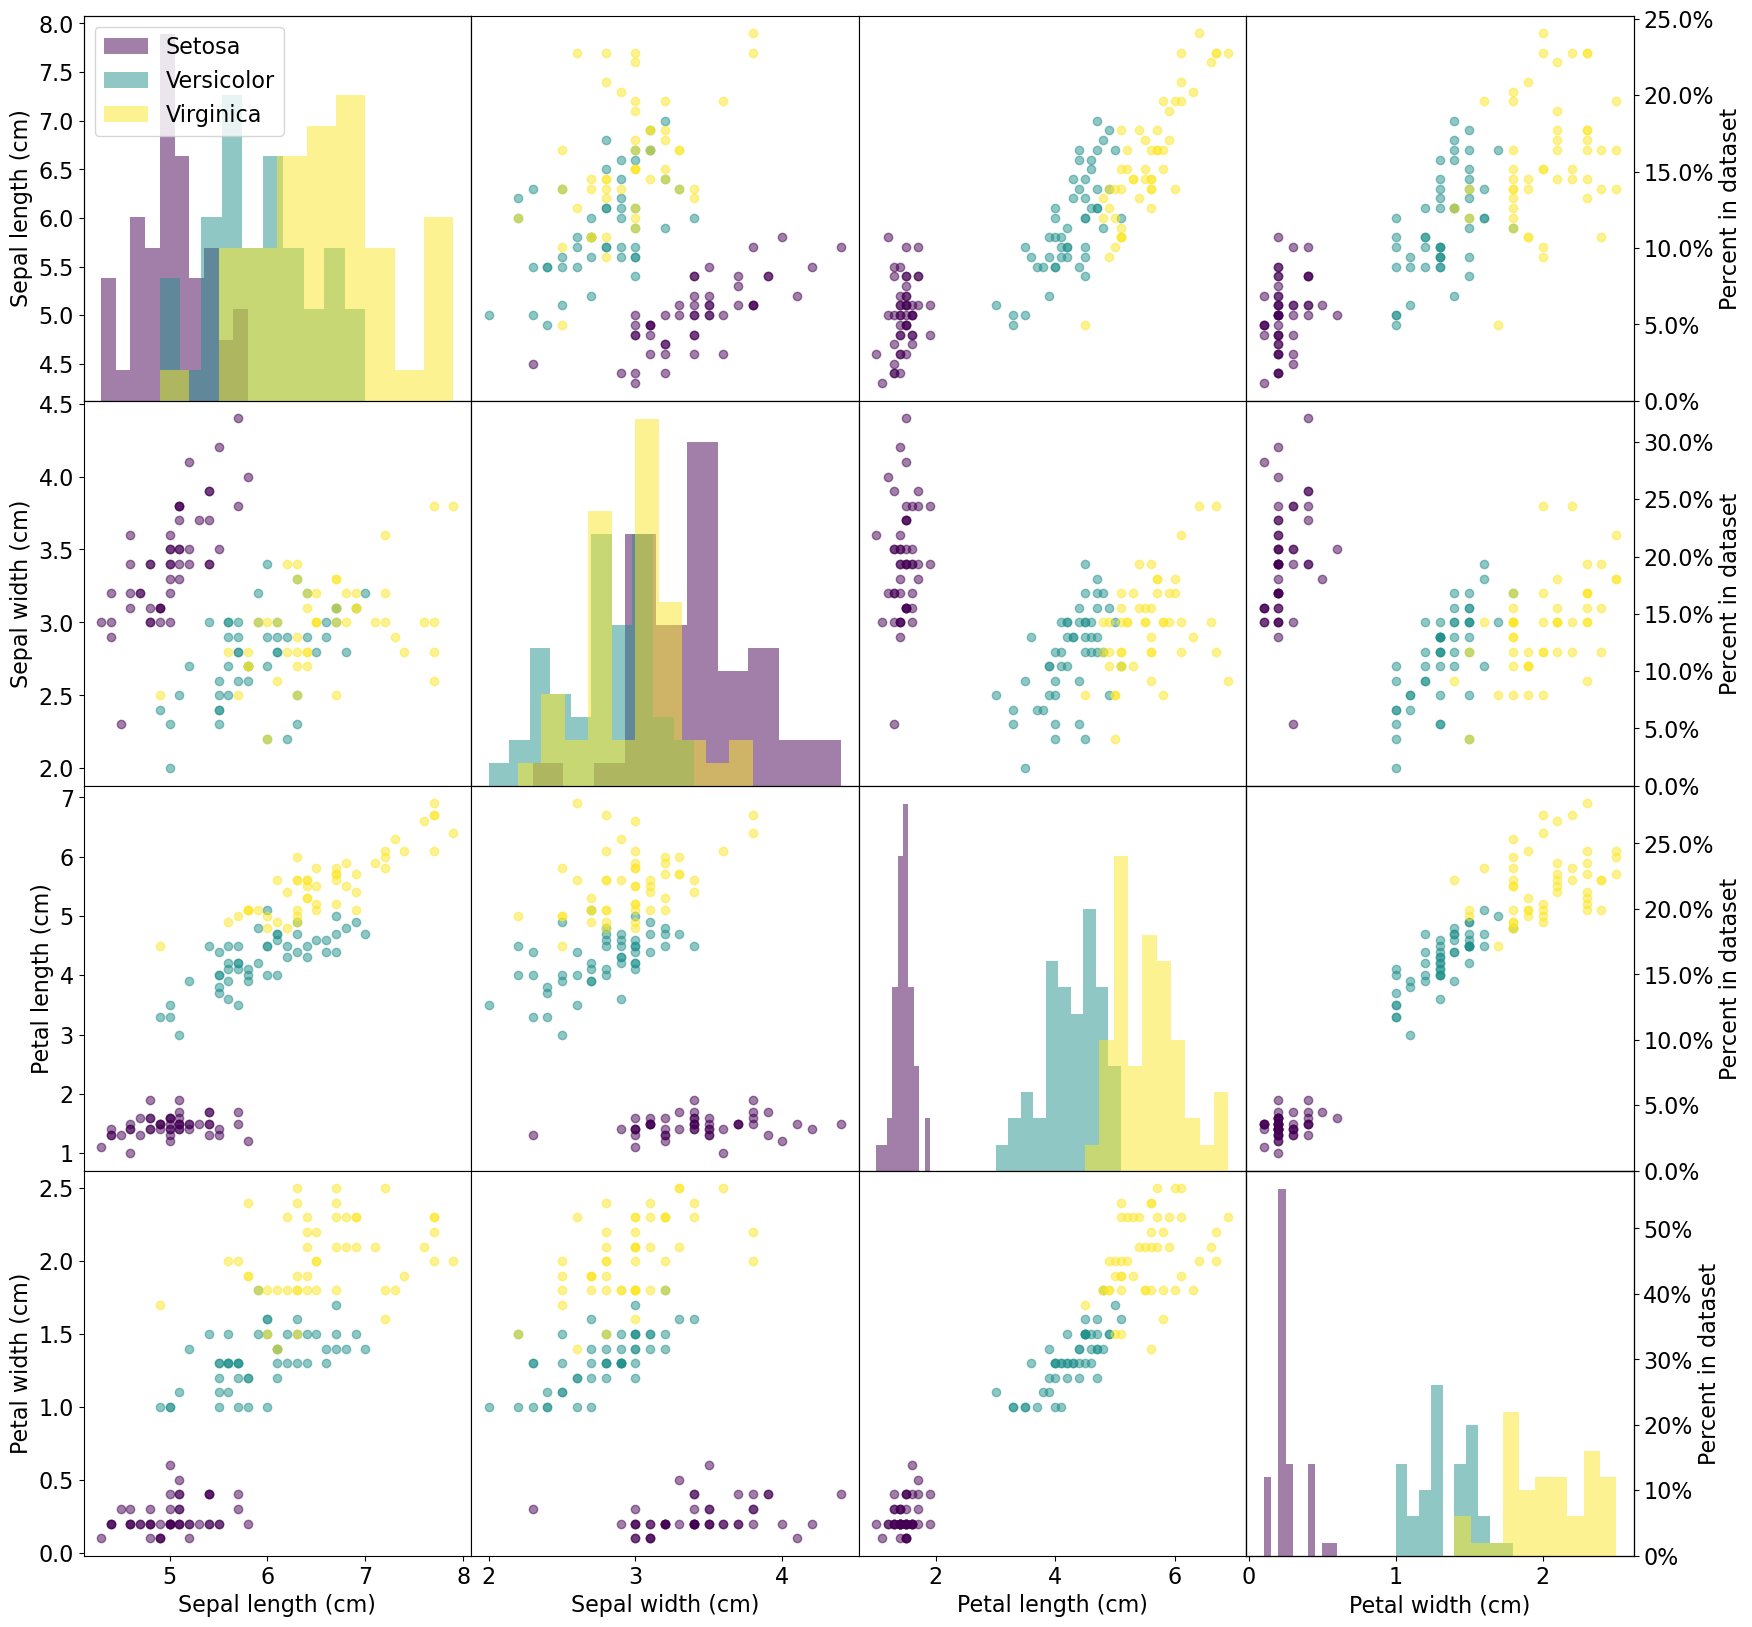

In [4]:
fig = plt.figure()
# Automatic creation
# axes = plt.subplots(4,4)
# plt.subplots_adjust(wspace=0, hspace=0)
# Manual creation (with changed access type!):
gs = plt.GridSpec(4, 4, wspace=0, hspace=0)
axes = [[fig.add_subplot(gs[i : i + 1, j : j + 1]) for j in range(4)] for i in range(4)]

for i, f1 in enumerate(features):
    for j, f2 in enumerate(features):
        # Scatterplots
        axes[i][j].sharey(axes[i][0 if i else 1])
        if i != j:
            axes[i][j].sharex(axes[0 if j else 1][j])
        axes[i][j].yaxis.set_visible(j == 0)
        axes[i][j].xaxis.set_visible(i == len(features) - 1)
        axes[i][j].set_ylabel(features[f1]["name"])
        axes[i][j].set_xlabel(features[f2]["name"])

        if i == j:
            continue

        for s in species:
            axes[i][j].scatter(
                dataframe[dataframe["Class"] == s][f2],
                dataframe[dataframe["Class"] == s][f1],
                color=species[s]["color"],
                label=species[s]["name"],
                alpha=0.5,
            )

    # Histogram
    ax_hist = axes[i][i].twinx()
    ax_r = axes[i][3].twinx()

    # Rightmost plots have shared twin axes with histograms to add labels
    ax_r.sharey(ax_hist)
    ax_hist.xaxis.set_visible(False)
    ax_hist.yaxis.set_visible(False)
    ax_r.xaxis.set_visible(False)
    ax_r.yaxis.set_visible(True)
    ax_r.set_ylabel("Percent in dataset")
    # This creates percentages
    ax_r.yaxis.set_major_formatter(PercentFormatter(1))

    for s in species:
        # Weights required for percentages (to ensure sum == 0)
        data = dataframe[dataframe["Class"] == s][f1]
        ax_hist.hist(
            data,
            color=species[s]["color"],
            alpha=0.5,
            weights=np.full(len(data), 1/len(data)),
            label=species[s]["name"],
        )

    if i == 0:
        ax_hist.legend(loc="upper left")
plt.show()